In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
def random_Paulis(q, angle=None):
    gate = np.random.rand()
    if angle == None:
        angle = 2*np.pi*np.random.rand()
        
    if gate < 1/3:
        return qml.RX(angle, wires=q)
    elif gate >= 1/3 and gate < 2/3:
        return qml.RY(angle, wires=q)
    else:
        return qml.RZ(angle, wires=q)

In [5]:
%%time
max_qubits = 18
depth = 280
gradients_q = []
for qubits in range(2, max_qubits, 2):
    dev = qml.device("default.qubit", wires=qubits)
    
    # build circuit
    @qml.qnode(dev, diff_method="parameter-shift")
    def circuit(theta1):
        for i in range(qubits):
            qml.RY(0.25*np.pi, wires=i)
        for p in range(depth):
            for j in range(qubits):
                if p == 0 and j == 0 :
                    random_Paulis(j, theta1)
                else:
                    random_Paulis(j)
            for j in range(qubits-1):
                qml.CZ(wires=[j,j+1])
        return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

    # Gradient w.r.t. theta1
    dcircuit = qml.grad(circuit,argnum=0)
    # expectation value over random unitarys 
    samples = 100 
    gradients = []
    for s in range(samples):
        gradients.append(dcircuit(2*np.pi*np.random.rand()))
    
    #print(np.var(gradients))
    gradients_q.append(np.var(gradients))

CPU times: user 30min 24s, sys: 1min 12s, total: 31min 36s
Wall time: 31min 38s


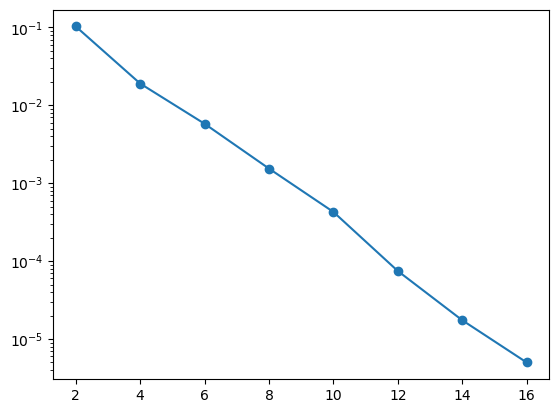

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(2, max_qubits, 2), gradients_q, marker='o')
plt.yscale('log')
plt.show()

In [12]:
%%time
qubits = [4,6,8,12]
depths = [5, 10 ,20, 50, 100, 150, 200, 250, 300, 400, 500]

gradients_q_d = []
for qubit in qubits:
    gradients_d = []
    for depth in depths:
        dev = qml.device("default.qubit", wires=qubit)
    
        # build circuit
        @qml.qnode(dev, diff_method="parameter-shift")
        def circuit(theta1):
            for i in range(qubit):
                qml.RY(0.25*np.pi, wires=i)
            for p in range(depth):
                for j in range(qubit):
                    if p == 0 and j == 0 :
                        random_Paulis(j, theta1)
                    else:
                        random_Paulis(j)
                for j in range(qubit-1):
                    qml.CZ(wires=[j,j+1])
            return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

        # Gradient w.r.t. theta1
        dcircuit = qml.grad(circuit,argnum=0)
        # expectation value over random unitarys 
        samples = 100 
        gradients = []
        for s in range(samples):
            gradients.append(dcircuit(2*np.pi*np.random.rand()))
    
        #print(np.var(gradients))
        gradients_d.append(np.var(gradients))
    gradients_q_d.append(gradients_d)

CPU times: user 57min 27s, sys: 29.6 s, total: 57min 56s
Wall time: 1h 28min 6s


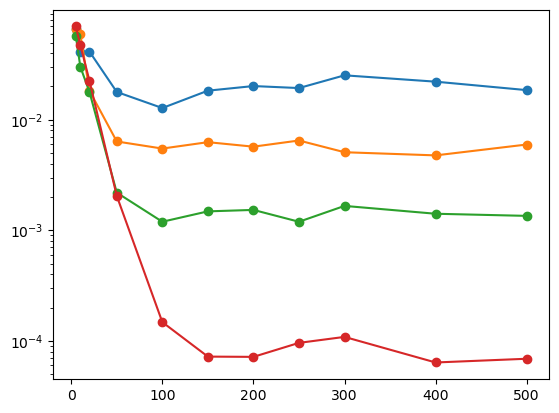

In [16]:
for k in gradients_q_d:
    plt.plot(depths, k, marker='o')

plt.yscale('log')
plt.show()

## Ry($\theta$)

In [20]:
%%time
max_qubits = 18
depth = 280
gradients_q = []
for qubits in range(2, max_qubits, 2):
    dev = qml.device("default.qubit", wires=qubits)
    
    # build circuit
    @qml.qnode(dev, diff_method="parameter-shift")
    def circuit(theta1):
        for i in range(qubits):
            qml.RY(0.25*np.pi, wires=i)
        for p in range(depth):
            for j in range(qubits):
                if p == 0 and j == 0 :
                    #random_Paulis(j, theta1)
                    qml.RY(theta1, wires=j)
                else:
                    #random_Paulis(j)
                    qml.RY(2*np.pi*np.random.rand(), wires=j)
            for j in range(qubits-1):
                qml.CZ(wires=[j,j+1])
        return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

    # Gradient w.r.t. theta1
    dcircuit = qml.grad(circuit,argnum=0)
    # expectation value over random unitarys 
    samples = 100 
    gradients = []
    for s in range(samples):
        gradients.append(dcircuit(2*np.pi*np.random.rand()))
    
    #print(np.var(gradients))
    gradients_q.append(np.var(gradients))

CPU times: user 32min 22s, sys: 1min 14s, total: 33min 36s
Wall time: 33min 38s


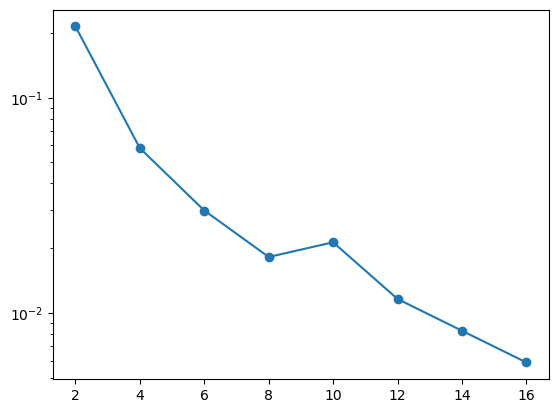

In [21]:
plt.plot(range(2, max_qubits, 2), gradients_q, marker='o')
plt.yscale('log')
plt.show()

## U3($\omega$, $\theta$, $\phi$) 

In [31]:
%%time
max_qubits = 18
depth = 280
gradients_q = []
for qubits in range(2, max_qubits, 2):
    dev = qml.device("default.qubit", wires=qubits)
    
    # build circuit
    @qml.qnode(dev, diff_method="parameter-shift")
    def circuit(theta1):
        for i in range(qubits):
            qml.RY(0.25*np.pi, wires=i)
        for p in range(depth):
            for j in range(qubits):
                if p == 0 and j == 0 :
                    #random_Paulis(j, theta1)
                    qml.Rot(theta1, 2*np.pi*np.random.rand(), 2*np.pi*np.random.rand(), wires=j)
                else:
                    #random_Paulis(j)
                    qml.Rot(2*np.pi*np.random.rand(), 2*np.pi*np.random.rand(), 2*np.pi*np.random.rand(), wires=j)
            for j in range(qubits-1):
                qml.CZ(wires=[j,j+1])
        return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

    # Gradient w.r.t. theta1
    dcircuit = qml.grad(circuit,argnum=0)
    # expectation value over random unitarys 
    samples = 100 
    gradients = []
    for s in range(samples):
        gradients.append(dcircuit(2*np.pi*np.random.rand()))
    
    #print(np.var(gradients))
    gradients_q.append(np.var(gradients))

CPU times: user 38min 59s, sys: 1min 17s, total: 40min 16s
Wall time: 40min 19s


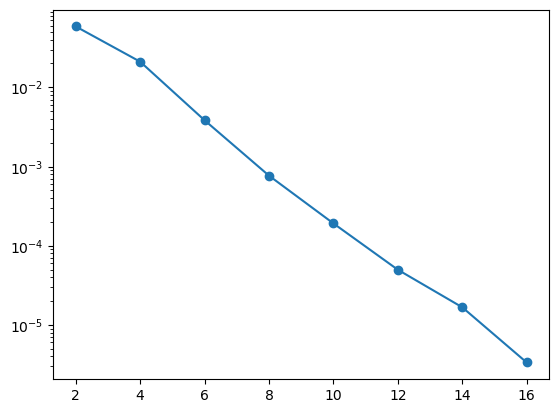

In [32]:
plt.plot(range(2, max_qubits, 2), gradients_q, marker='o')
plt.yscale('log')
plt.show()